## Deep Learning Project

Fashion classification

Import libraries

In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
(X_train, y_train),(X_test, y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
(X_train, y_train),(X_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

In [8]:
class_labels=["T-shirt/top","Trowser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

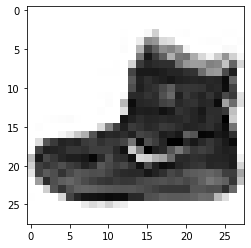

In [9]:
plt.imshow(X_train[0], cmap="Greys")

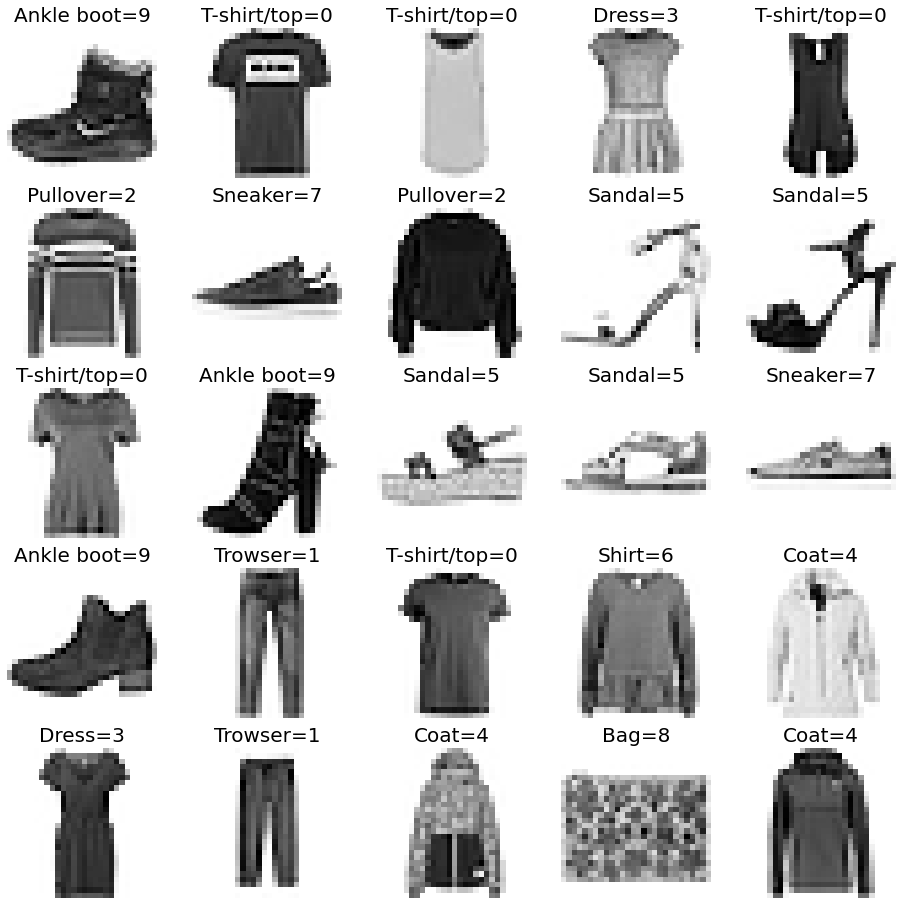

In [10]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

Feature Scaling

In [11]:
#For neural network we have to do normalization of image
X_train=X_train/255                   #now we get data in the range of 0 to 1 
X_test= X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Build Neural Network

In [13]:
model= keras.models.Sequential([
   keras.layers.Flatten(input_shape=[28,28]),
   keras.layers.Dense(units=32, activation='relu'),        #relu=if 0 in input then send 0 in output (Hidden layer))
   keras.layers.Dense(units=10, activation='softmax')      # softmax=check probabilty how much it look similar 
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#optimizer uses like gradient descent here we use adam
#loss- for error in classification problem we use cross entropy

In [16]:
model.fit(X_train, y_train, epochs=2)
#epochs mean e.g their are 60,000 images then it comes to neural network for train like 
#if we improve epohs =5 then it train on same data 5 times means accuracy improve

Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5510 - accuracy: 0.8108
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4215 - accuracy: 0.8534


In [17]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3890 - accuracy: 0.8626
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3669 - accuracy: 0.8688
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3543 - accuracy: 0.8729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8774
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3273 - accuracy: 0.8810
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3191 - accuracy: 0.8851
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3102 - accuracy: 0.8872
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3017 - accuracy: 0.8893
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8916
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.291

Test and Evaluate Neural Network Model

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3663 - accuracy: 0.8687


[0.3663325011730194, 0.8687000274658203]

In [19]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [20]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.05, 0.  , 0.92],
      dtype=float32)

In [21]:
np.argmax(y_pred[0].round(2))

9

In [22]:
y_test[0]

9

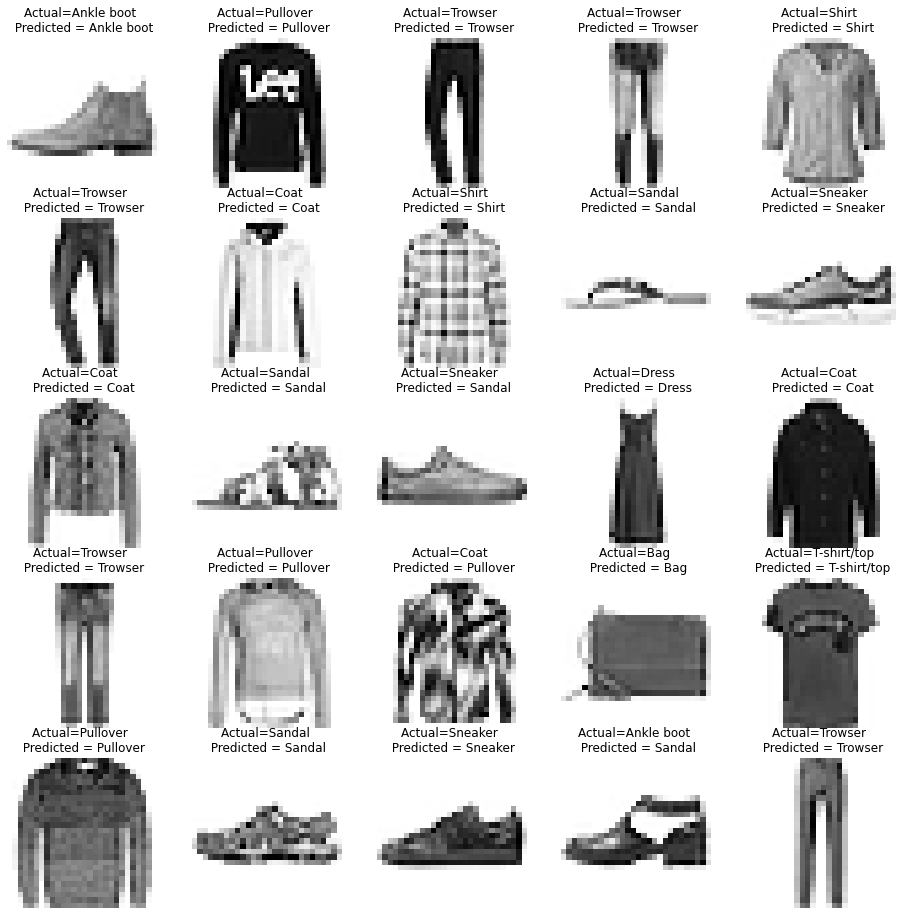

In [23]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual={} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])], fontsize=20))

In [24]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

<Axes: >

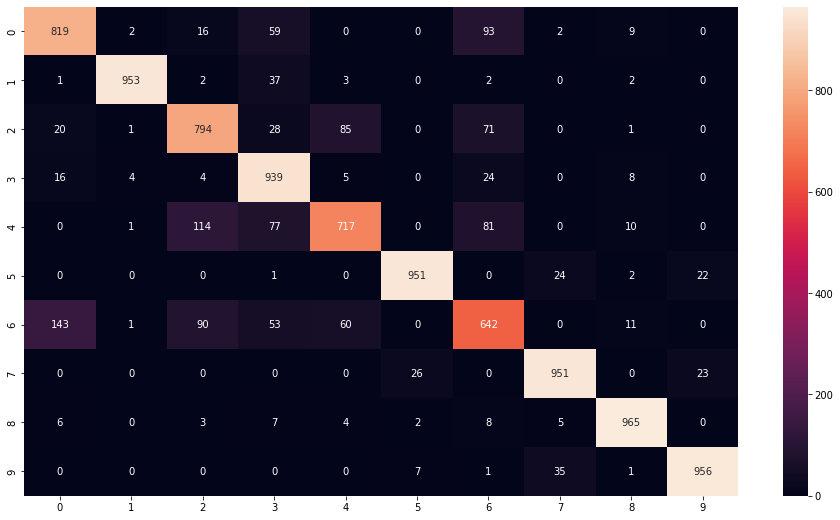

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt="d")

Classification Report

In [26]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, [np.argmax(i) for i in y_pred], target_names= class_labels,)

In [27]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.82      0.82      1000
     Trowser       0.99      0.95      0.97      1000
    Pullover       0.78      0.79      0.78      1000
       Dress       0.78      0.94      0.85      1000
        Coat       0.82      0.72      0.77      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.70      0.64      0.67      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Save Model

In [28]:
model.save("MNIST_classifier_Neuralnetwork_model.h5")

Load Model

In [29]:
model= keras.models.load_model("MNIST_classifier_Neuralnetwork_model.h5")

In [30]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[1.60838442e-06, 2.43855353e-10, 5.56497116e-06, ...,
        5.43443300e-02, 4.67317499e-04, 9.23591256e-01],
       [2.49456571e-05, 3.42457368e-10, 9.68858302e-01, ...,
        3.46329614e-14, 5.09886924e-08, 1.32442310e-16],
       [2.80398788e-04, 9.99692678e-01, 3.75656299e-07, ...,
        1.23449455e-13, 5.17535028e-08, 2.47166193e-13],
       ...,
       [1.51927618e-03, 3.12854409e-10, 1.01487931e-04, ...,
        2.42129289e-07, 9.98202264e-01, 4.24304814e-10],
       [1.15099465e-05, 9.98583078e-01, 1.53248322e-06, ...,
        1.24826249e-09, 1.34908248e-07, 3.90679595e-08],
       [8.21922731e-06, 1.77420012e-09, 1.54159334e-05, ...,
        2.67649861e-03, 9.37306904e-04, 3.89508614e-06]], dtype=float32)